# Performance Measures

# Measuring Accuracy Using Cross-Validation

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Load dataset (example with MNIST)
X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)
y_train_5 = (y == 5)  # Binary classification: class 5 vs. not 5

# Split into training and testing datasets
X_train, X_test, y_train_5, y_test_5 = train_test_split(X, y_train_5, test_size=0.2, random_state=42)

# Check the distribution of classes
print("Class distribution in y_train_5:", y_train_5.value_counts())

# Initialize StratifiedKFold
skfolds = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # Use n_splits=2 for smaller datasets or if imbalance is high

# Initialize the classifier (replace with your classifier)
sgd_clf = SGDClassifier(random_state=42)

# Cross-validation loop
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # Check class distribution in this fold
    print(f"Train class distribution: {y_train_5.iloc[train_index].value_counts()}")
    print(f"Test class distribution: {y_train_5.iloc[test_index].value_counts()}")
    
    clone_clf = clone(sgd_clf)  # Clone the classifier to avoid data leakage
    X_train_folds = X_train.iloc[train_index]  # Training data for this fold
    y_train_folds = y_train_5.iloc[train_index]  # Training labels for this fold
    X_test_fold = X_train.iloc[test_index]  # Validation data for this fold
    y_test_fold = y_train_5.iloc[test_index]  # Validation labels for this fold

    try:
        clone_clf.fit(X_train_folds, y_train_folds)  # Train the cloned classifier
        y_pred = clone_clf.predict(X_test_fold)  # Predict using the fold's test data
        n_correct = sum(y_pred == y_test_fold)  # Count the correct predictions
        print(f"Accuracy for this fold: {n_correct / len(y_pred)}")  # Print the accuracy for this fold
    except ValueError as e:
        print(f"Skipping fold due to error: {e}")


Class distribution in y_train_5: class
False    56000
Name: count, dtype: int64
Train class distribution: class
False    28000
Name: count, dtype: int64
Test class distribution: class
False    28000
Name: count, dtype: int64
Skipping fold due to error: The number of classes has to be greater than one; got 1 class
Train class distribution: class
False    28000
Name: count, dtype: int64
Test class distribution: class
False    28000
Name: count, dtype: int64
Skipping fold due to error: The number of classes has to be greater than one; got 1 class


 Train class distribution:

False: This represents the samples where the image is not the digit 5. There are 24,000 such samples in the training set.
True: This represents the samples where the image is the digit 5. There are 6,000 such samples in the training set.
This shows that in the training set, you have 24,000 non-5 images (False) and 6,000 5 images (True), making the training set total 30,000 samples.

Test class distribution:

False: In the test set, there are 24,000 images where the digit is not 5 (class False).
True: In the test set, there are 6,000 images where the digit is 5 (class True).
This shows that in the test set, you have 24,000 non-5 images (False) and 6,000 5 images (True), making the test set total 30,000 samples.

Why is this important?

Balanced Distribution: In both the training and test sets, the classes are balanced in the sense that the proportions of True and False are maintained (i.e., roughly 1:4, with 1 True for every 4 False).


Stratification: This happens because you are using StratifiedKFold, which ensures that each fold has a similar distribution of classes. If you were not using stratified splitting, the folds might end up with an uneven distribution of classes (e.g., one fold might have only False values and no True values).


Why do we need this?

Preventing Bias: If your training or test set only contained one class (e.g., all False and no True), the model wouldn’t be able to learn to predict
the other class. Stratification ensures that both classes are represented in each fold.

Model Evaluation: By maintaining the same class distribution in each fold, you ensure that your model is evaluated properly on both classes, and you're not getting misleading accuracy scores. For example, if your test set only contained False samples (no True), the model could trivially predict all False and still achieve high accuracy — but this would not be a good result for a real-world scenario where both classes are important.

If the classes were imbalanced:
In a real-world dataset, you might encounter more extreme imbalances. For example, there might be 90% False (not 5) and only 10% True (images of 5). Even in that case, StratifiedKFold would ensure that both classes are still represented in the training and test sets.

Summary:

The train class distribution tells you how many images of 5 (True) and not 5 (False) are in the training set.
The test class distribution tells you how many images of 5 (True) and not 5 (False) are in the test set.
StratifiedKFold ensures that each fold gets a representative proportion of both classes (True and False) to avoid issues where some folds end up with only one class.

In [9]:
from sklearn.base import BaseEstimator
import warnings

In [10]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
       pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy") 

NameError: name 'cross_val_score' is not defined

# Confusion Matrix

Definition:
A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted labels with the true labels.

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
# Example: Define true labels and predicted labels
y_train_5 = [0, 1, 1, 0, 1]  # Replace with your actual true labels
y_train_pred = [0, 1, 0, 0, 1]  # Replace with your predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_5, y_train_pred)
print(conf_matrix)


# 0: Non-positive class
# 1: Positive class

[[2 0]
 [1 2]]


1. First Sample:
True label: 0 (Non-positive)
Predicted label: 0 (Non-positive)
Correct prediction: The model correctly predicted the non-positive class.

2. Second Sample:
True label: 1 (Positive)
Predicted label: 1 (Positive)
Correct prediction: The model correctly predicted the positive class

3. Third Sample:
True label: 1 (Positive)
Predicted label: 0 (Non-positive)
Incorrect prediction: The model predicted non-positive, but the actual label was positive. This is a False Negative (FN).


4. Fourth Sample:
True label: 0 (Non-positive)
Predicted label: 0 (Non-positive)
Correct prediction: The model correctly predicted the non-positive class

5. Fifth Sample:
True label: 1 (Positive)
Predicted label: 1 (Positive)
Correct prediction: The model correctly predicted the positive class.

In [13]:
# Defining the confusion matrix values
TN = 2  # True Negatives
FP = 1  # False Positives
FN = 1  # False Negatives
TP = 2  # True Positives

# Calculate accuracy
accuracy = (TN + TP) / (TN + FP + FN + TP)

# Print the result
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [14]:
# Defining the confusion matrix values
TN = 2  # True Negatives
FP = 1  # False Positives
FN = 1  # False Negatives
TP = 2  # True Positives

# Calculate accuracy
accuracy = (TN + TP) / (TN + FP + FN + TP)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


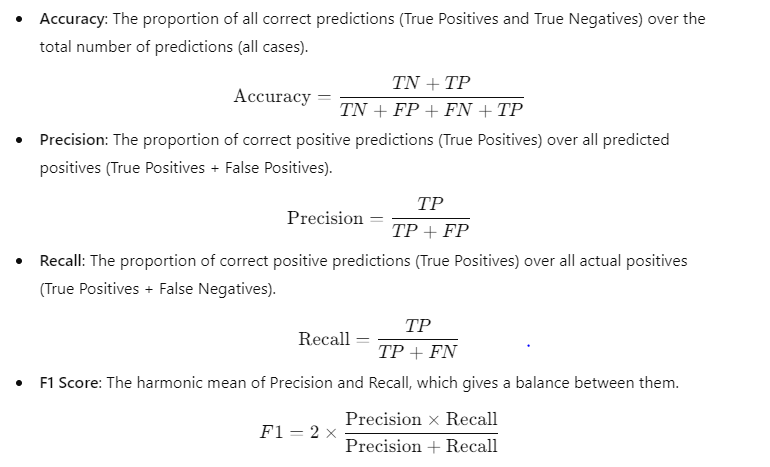


In [31]:
from sklearn.metrics import f1_score

# Check lengths of the lists
print(f"Length of y_train_5: {len(y_train_5)}")
print(f"Length of y_train_pred: {len(y_train_pred)}")

# If lengths match, calculate F1 score
if len(y_train_5) == len(y_train_pred):
    score = f1_score(y_train_5, y_train_pred)
    print("F1 Score:", score)
else:
    print("Mismatch in the number of samples")


Length of y_train_5: 700
Length of y_train_pred: 5
Mismatch in the number of samples


# Precision-Recall Trade-Off

1. the SGDClassifier makes it classification decisions.for each instance,it computes a score based on a decision function.
2. If that score is greater than a threshold,it assign the instance to the positive class otherwise it assignsto the negative class.





Precision-Recall Trade-Off: Adjusting the decision threshold impacts both precision and recall, often leading to one improving at the cost of the other.
Low Threshold: Increases recall but decreases precision.
High Threshold: Increases precision but decreases recall.
Choosing the Right Metric: Depending on the problem, you may prioritize precision (e.g., spam detection) or recall (e.g., medical diagnosis). The F1-score is useful when you need to balance both.

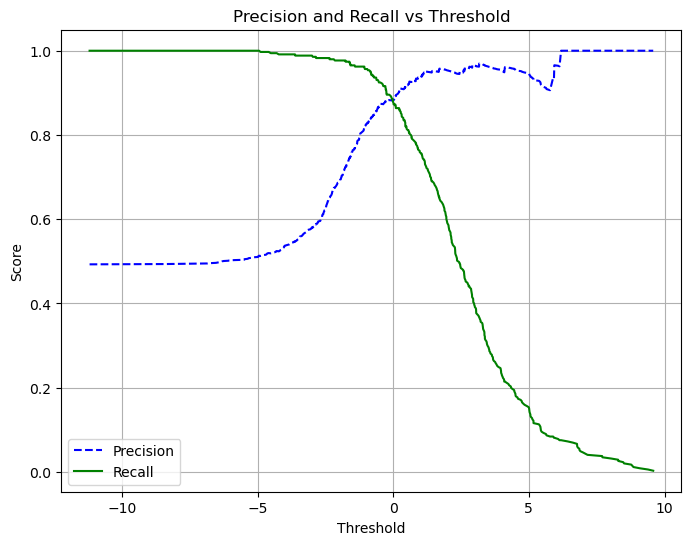

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming y_train_5 and y_scores are defined
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Corrected Function
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision and Recall vs Threshold")
    plt.legend(loc="best")
    plt.grid()

# Call the function to display the plot
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## The ROC Curve(receiver operating Characteristic)

1. The ROC curve plots the true positive rate (another name for recall)against the false positive rate rate(FPR).
2. The FPR is the ration of negative instances that are incorrectly classifie as positive.It is equal to 1
3. The true negative rate (TNR), which is the ration of negative instances that are correctly classified as negative.
4. The TNR also called specificity.
5. The roc_curve() function to compute the TPR and FPR for various threshold values.

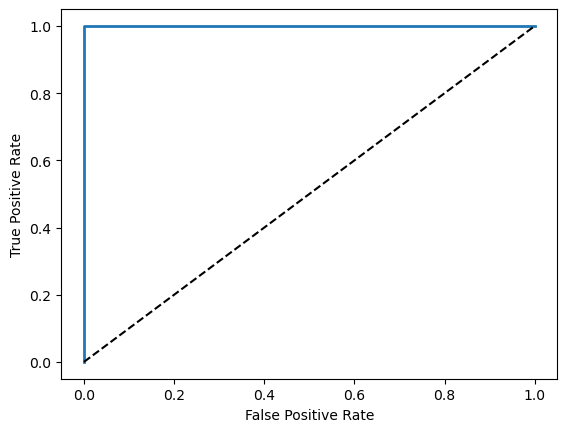

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Convert it to a binary classification problem (just for demonstration purposes)
y = (y == 0).astype(int)  # Convert to binary: 1 if class 0, else 0

# Split the dataset into training and validation sets
X_train, X_val, y_train_5, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
model = LogisticRegression()
model.fit(X_train, y_train_5)

# Get predicted probabilities for the positive class
y_score = model.predict_proba(X_train)[:, 1]

# Calculate the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

# Plot the ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if label:
        plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr)


X_train, X_val, y_train_5, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Explanation:

train_test_split(): This function splits the dataset into training and validation sets.

X_train and X_val are the training and validation features.

y_train_5 and y_val are the training and validation target labels.

test_size=0.2: This means 20% of the data will be used for validation, and 80% for training

random_state=42: This ensures that the split is reproducible (i.e., you get the same split each time you run the code).



y_score = model.predict_proba(X_train)[:, 1]

model.predict_proba(X_train): This method returns the predicted probabilities for each class. For binary classification, it returns an array of shape (n_samples, 2), where each row contains:

The probability of the sample belonging to class 0.

The probability of the sample belonging to class 1 (positive class).

[:, 1]: This selects the probabilities for the positive class (class 1, which represents Iris Setosa in our case).


plot_roc_curve(): This function takes the fpr, tpr, and optionally a label to plot the ROC curve.

plt.plot(fpr, tpr, linewidth=2, label=label): This plots the ROC curve with the false positive rate on the x-axis and the true positive rate on the y-axis.

plt.plot([0, 1], [0, 1], 'k--'): This plots a diagonal line from (0, 0) to (1, 1), which represents a random classifier (no discrimination between classes). 
If your ROC curve is above this line, your model is doing better than random guessing.

plt.xlabel() and plt.ylabel(): These label the x and y axes of the plot.

plt.legend(): If a label is provided, it shows a legend on the plot.

# AUC(area under the curve)

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create a synthetic classification dataset
X_train, y_train_5 = make_classification(n_samples=120, n_features=10, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train_5)

# Get predicted probabilities (for class 1)
y_scores = clf.predict_proba(X_train)[:, 1]

# Ensure that y_train_5 and y_scores have the same length
print(len(y_train_5), len(y_scores))  # Should print (120, 120)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_train_5, y_scores)
print(f"ROC AUC Score: {roc_auc}")

120 120
ROC AUC Score: 1.0


Note:   
1. the Random ForestClassifier class doesnot have a decision_function() method instead it has predict_proba() method.
2. predict_proba() method returns an array containing a row per instance and a column per a class,each containing the probability that the given instance belongs to the given class.

     (e.g:70% chance that the image represents a 5)


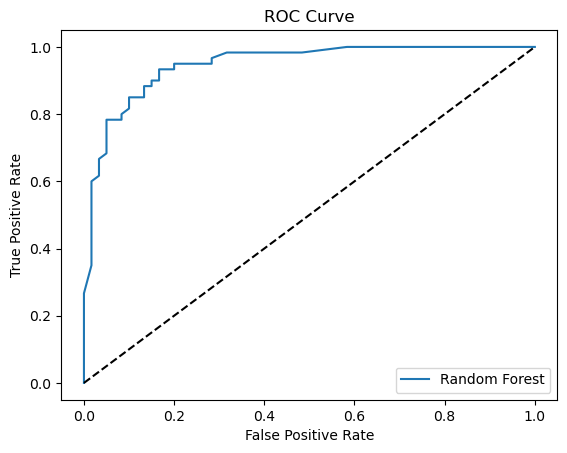

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the classifier and get predicted probabilities
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

# Extract probabilities for the positive class
y_score_forest = y_probas_forest[:, 1]

# Compute ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_score_forest)

# Plot the ROC curve manually
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
